In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d

# \pi' comparison between class and hi-class

In [3]:
hiclass_cs0=np.loadtxt("./Kessence_field_cs2.dat")
hiclass__bg=np.loadtxt("./hi_cs2_background.dat")
# hiclass_new=np.loadtxt("./Kessence_field_class_Newhiclass.dat")
# hiclass_cs1=np.loadtxt("./Kessence_field_cs1.dat")
# hiclass_cs0z0=np.loadtxt("./Kessence_field_cs0_z0.dat")
# class_cs0_synch=np.loadtxt("./class_kess_cs0_synch_tk.dat")
# class_cs1_synch=np.loadtxt("./class_kess_cs1_synch_tk.dat")
# class_cs0_newt=np.loadtxt("./class_kess_cs0_newt_tk.dat")
# class_cs1_newt=np.loadtxt("./class_kess_cs1_newt_tk.dat")

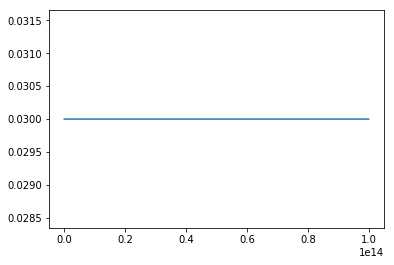

In [4]:
plt.plot(hiclass__bg[:,0],hiclass__bg[:,22])
plt.show()

# Make the file of hi-class

# Making file in Newtonian gauge at z=100

In [16]:
h=0.67;
# file=open("kessenc.dat",'w+');
data_hi = hiclass_cs0
astar_hi=1./101. # z=100, desired redshift
ainterval_hi=0.03
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
hiclass_cs0_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition
Gev_cs0=np.zeros((np.shape(klist_hi)[0],4)); # the Gev appropriate file
psi_cs0_hiclass=np.zeros((np.shape(klist_hi)[0],2));                                            # For Gev the K must be in h/Mpc like class
                                             #It must be in Newtonian gauge

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])
    
    hiclass_cs0_fin[i,0]=klist_hi[i]
    hiclass_cs0_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs0_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs0_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs0_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs0_fin[i,5]=interp_psi(astar_hi)
    psi_cs0_hiclass[i,0]=klist_hi[i];
    psi_cs0_hiclass[i,1]=hiclass_cs0_fin[i,5];
    Gev_cs0[i,0]=hiclass_cs0_fin[i,0];
    Gev_cs0[i,1]=hiclass_cs0_fin[i,1]+hiclass_cs0_fin[i,3];
    Gev_cs0[i,2]=hiclass_cs0_fin[i,2]+hiclass_cs0_fin[i,4];
    Gev_cs0[i,3]=dataprime_hi[i,1];
    
Result=Gev_cs0[::-1,:];
ResultAll=hiclass_cs0_fin[::-1,:];
Result_phi_z0=psi_cs0_hiclass[::-1,:];
np.savetxt('kessence_gev_cs0z100.dat', Result, fmt='%.12e', delimiter='\t', newline='\n')
np.savetxt('kessence_Allhiclass_cs0z100.dat', ResultAll, fmt='%.12e', delimiter='\t', newline='\n')
np.savetxt('phi_hiclass_cs0z100.dat', Result_phi_z0, fmt='%.12e', delimiter='\t', newline='\n')

# hiclass_cs0_fin[:30,0]

In [17]:
# plt.plot(phi_hiclass_output[:,0],phi_hiclass_output[:,1],color="Blue",label=r" z=100")
# params for makin power dimensionless
As=2.19*10**-9;
h=0.67;
kp=0.05/h; 
ns=0.96;
H=2.25*10**-4
#Plot setting
psi=hiclass_cs0_fin[:,4]+ H*hiclass_cs0_fin[:,3]
# Psi_Gev_scaled=np.sqrt(Psi_Gev[:,1]*(As*(Psi_Gev[:,0]/kp)**(ns-1))**-1);
# Psi_GevStrd_scaled=np.sqrt(Psi_Gev_Normal[:,1]*(As*(Psi_Gev_Normal[:,0]/kp)**(ns-1))**-1);

# phi_class_output_scaled=np.sqrt(phi_class_output[:,1])

plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.plot(hiclass_cs0_fin[:,0], hiclass_cs0_fin[:,5],color="red",label=r"hiclass internally, z=100")
plt.plot(hiclass_cs0_fin[:,0], psi[:],color="blue",label=r"hiclass internally, z=100")
plt.plot(hiclass_new[:,0], hiclass_new[:,2],color="green",label=r"hiclass internally, z=100")

# plt.plot(Psi_class[:,0], Psi_class[:,1],color="blue",label=r"Class internally, z=100")
# plt.plot(phi_class_output[:,0]*h, phi_class_output[:,7],color="green",label=r"Class output,z=100")
# plt.plot(Psi_Gev[:,0], Psi_Gev_scaled[:],color="black",label=r"Class output,z=100")
# plt.plot(Psi_Gev_Normal[:,0], Psi_GevStrd_scaled[:],color="Purple",label=r"Class output,z=100")

plt.legend(bbox_to_anchor=(0.8, 0.90, 0.2, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$P_{\pi}[Mpc^3]$",fontsize=20)
plt.xlim(0.0001,5)
# plt.ylim(1.e-17,1.e-1)
# plt.savefig('field_derivative_comparison.jpg',bbox_inches='tight')
plt.show()


NameError: name 'hiclass_new' is not defined

# Making file in Newtonian gauge at z=10

In [18]:
h=0.67;
# file=open("kessenc.dat",'w+');
data_hi = hiclass_cs0
astar_hi=1./(10.+1.) # z=10, desired redshift
ainterval_hi=0.03
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
hiclass_cs0_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition
Gev_cs0=np.zeros((np.shape(klist_hi)[0],4)); # the Gev appropriate file
                                             # For Gev the K must be in h/Mpc like class
                                             #It must be in Newtonian gauge

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])
    
    hiclass_cs0_fin[i,0]=klist_hi[i]
    hiclass_cs0_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs0_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs0_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs0_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs0_fin[i,5]=interp_psi(astar_hi)
    
    Gev_cs0[i,0]=hiclass_cs0_fin[i,0];
    Gev_cs0[i,1]=hiclass_cs0_fin[i,1]+hiclass_cs0_fin[i,3];
    Gev_cs0[i,2]=hiclass_cs0_fin[i,2]+hiclass_cs0_fin[i,4];
    Gev_cs0[i,3]=dataprime_hi[i,1];

Result=Gev_cs0[::-1,:]
ResultAll=hiclass_cs0_fin[::-1,:];
np.savetxt('kessence_Allhiclass_cs0z10.dat', ResultAll, fmt='%.12e', delimiter='\t', newline='\n')
np.savetxt('kessence_gev_cs0z10.dat', Result, fmt='%.12e', delimiter='\t', newline='\n')
# hiclass_cs0_fin[:30,0]

# Making file in Newtonian gauge at z=3

In [19]:
h=0.67;
# file=open("kessenc.dat",'w+');
data_hi = hiclass_cs0
astar_hi=1./(3.+1.) # z=3, desired redshift
ainterval_hi=0.03
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
hiclass_cs0_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition
Gev_cs0=np.zeros((np.shape(klist_hi)[0],4)); # the Gev appropriate file
                                             # For Gev the K must be in h/Mpc like class
                                             #It must be in Newtonian gauge

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])
    
    hiclass_cs0_fin[i,0]=klist_hi[i]
    hiclass_cs0_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs0_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs0_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs0_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs0_fin[i,5]=interp_psi(astar_hi)
    
    Gev_cs0[i,0]=hiclass_cs0_fin[i,0];
    Gev_cs0[i,1]=hiclass_cs0_fin[i,1]+hiclass_cs0_fin[i,3];
    Gev_cs0[i,2]=hiclass_cs0_fin[i,2]+hiclass_cs0_fin[i,4];
    Gev_cs0[i,3]=dataprime_hi[i,1];

Result=Gev_cs0[::-1,:]
ResultAll=hiclass_cs0_fin[::-1,:];
np.savetxt('kessence_Allhiclass_cs0z3.dat', ResultAll, fmt='%.12e', delimiter='\t', newline='\n')
np.savetxt('kessence_gev_cs0z3.dat', Result, fmt='%.12e', delimiter='\t', newline='\n')
# hiclass_cs0_fin[:30,0]

# Making file in Newtonian gauge at z=0

In [20]:
h=0.67;
# file=open("kessenc.dat",'w+');
data_hi = hiclass_cs0
astar_hi=1./(0.+1.) # z=0, desired redshift
ainterval_hi=0.03
mask_hi = np.logical_and(data_hi[:,1]>astar_hi-ainterval_hi, data_hi[:,1]<astar_hi+ainterval_hi)
# 1 is a column
dataprime_hi = data_hi[mask_hi]

condition_hi=np.zeros(np.shape(dataprime_hi)[0])
for i in range(0,np.shape(dataprime_hi)[0]-1):
    condition_hi[i]=int(np.array_equal(dataprime_hi[i,0],dataprime_hi[i+1,0]))
#0 is k
klistinitial_hi=np.zeros(np.shape(dataprime_hi)[0]);
j=0;
for i in range (0,np.shape(dataprime_hi)[0]-1):
    if (condition_hi[i]==0):
        klistinitial_hi[j]=dataprime_hi[i-1,0]
        j+=1;

klist_hi = klistinitial_hi[klistinitial_hi!=0]
# klist_hi

dataprime_separated_hi = np.zeros((np.shape(klist_hi)[0],np.shape(dataprime_hi)[0],7))
for l,p in enumerate(klist_hi):
    w = np.shape(dataprime_hi[dataprime_hi[:,0]==p])[0]
    dataprime_separated_hi[l,:w,:] = dataprime_hi[dataprime_hi[:,0]==p]
#     print("separated",dataprime_separated)
np.shape(dataprime_separated_hi)
hiclass_cs0_fin=np.zeros((np.shape(klist_hi)[0],6)); # the final file for the fiels are initialized, klist is the list ok k without repitition
# Transfer_kess=np.zeros((np.shape(klist)[0],8)); # the final file for the fiels are initialized, klist is the list ok k without repitition
Gev_cs0=np.zeros((np.shape(klist_hi)[0],4)); # the Gev appropriate file
                                             # For Gev the K must be in h/Mpc like class
                                             #It must be in Newtonian gauge

for i in range(np.shape(klist_hi)[0]):
#     print(i)
    Vec_x_hi = dataprime_separated_hi[i,dataprime_separated_hi[i,:,0]!=0,:]
    interp_pi_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,2])
    interp_pi_prime_synch =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,3])
    interp_alpha =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,4])
    interp_alpha_prime =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,5])
    interp_psi =interp1d(Vec_x_hi[:,1],Vec_x_hi[:,6])
    hiclass_cs0_fin[i,0]=klist_hi[i]
    hiclass_cs0_fin[i,1]=interp_pi_synch(astar_hi)
    hiclass_cs0_fin[i,2]=interp_pi_prime_synch(astar_hi)
    hiclass_cs0_fin[i,3]=interp_alpha(astar_hi)
    hiclass_cs0_fin[i,4]=interp_alpha_prime(astar_hi)
    hiclass_cs0_fin[i,5]=interp_psi(astar_hi)
    
    Gev_cs0[i,0]=hiclass_cs0_fin[i,0];
    Gev_cs0[i,1]=hiclass_cs0_fin[i,1]+hiclass_cs0_fin[i,3];
    Gev_cs0[i,2]=hiclass_cs0_fin[i,2]+hiclass_cs0_fin[i,4];
    Gev_cs0[i,3]=dataprime_hi[i,1];

Result=Gev_cs0[::-1,:]
ResultAll=hiclass_cs0_fin[::-1,:];
np.savetxt('kessence_Allhiclass_cs0z0.dat', ResultAll, fmt='%.12e', delimiter='\t', newline='\n')
np.savetxt('kessence_gev_cs0z0.dat', Result, fmt='%.12e', delimiter='\t', newline='\n')
# hiclass_cs0_fin[:30,0]